# Importing Libraries

In [1]:
%cd ..

/Users/yuanqi/Desktop/DSA4262-ACMXZ


In [1]:
import pandas as pd
import numpy as np
import os

#from util.model import (modelling)

# Loading Data

### Loading parquets

In [13]:
## Load Datasets
X_train_25_path = "../data/new_preprocessed_data/training/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

y_train_path = "../data/new_preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [44]:
## Load Datasets
X_train_50_path = "../data/new_preprocessed_data/training/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

X_train_75_path = "../data/new_preprocessed_data/training/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

X_train_mean_path = "../data/new_preprocessed_data/training/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)


In [7]:
X_train_path = "../data/new_preprocessed_data/training/X_train_enc.parquet" ## to edit file path
X_train = pd.read_parquet(X_train_path)

y_train_path = "../data/new_preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [12]:
X_train.columns, X_test.columns

(Index(['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50',
        'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_25',
        'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_25', 'mean_-1_50',
        'mean_-1_75', 'mean_-1_mean', 'dwelling_time_0_25',
        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
        'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_25',
        'mean_0_50', 'mean_0_75', 'mean_0_mean', 'dwelling_time_+1_25',
        'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
        'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_25',
        'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'position_0_A',
        'position_0_C', 'position_0_G', 'position_0_T', 'position_1_A',
        'position_1_C', 'position_1_G', 'position_1_T', 'position_2_A',
        'position_2_C', 'position_2_G', 'position_2_T', 'position_3_A',
        'position_3_C', 'position_3_G', 'position_3_T', 'position_4

In [43]:
## Load in Test Set
#X_test_path = "../data/preprocessed_data/test/X_test_enc.parquet"
X_test_path = "../data/new_preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "../data/new_preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc and auc calculation

## Load in Validation Set
X_val_path = "../data/new_preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "../data/new_preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

In [51]:
## need to drop columns for X validation and test data

X_val_25 = X_val.drop(['dwelling_time_-1_50','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_50','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_75', 'std_0_mean',
       'mean_0_50', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_75', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'], axis = 1)

X_val_50 = X_val.drop(['dwelling_time_-1_25','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_25', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_25','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_25', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_25', 'std_0_75', 'std_0_mean',
       'mean_0_25', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_25', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_25', 'std_+1_75', 'std_+1_mean',
       'mean_+1_25', 'mean_+1_75', 'mean_+1_mean'], axis = 1)
X_val_75 = X_val.drop(['dwelling_time_-1_50','dwelling_time_-1_25', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_25', 'std_-1_mean', 
        'mean_-1_50','mean_-1_25', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_25', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_25', 'std_0_mean',
       'mean_0_50', 'mean_0_25', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_25', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_25', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_25', 'mean_+1_mean'], axis = 1)
X_val_mean = X_val.drop(['dwelling_time_-1_50','dwelling_time_-1_25', 'dwelling_time_-1_75', 
        'std_-1_50', 'std_-1_25', 'std_-1_75', 
        'mean_-1_50','mean_-1_25', 'mean_-1_75',
        'dwelling_time_0_50', 'dwelling_time_0_25', 'dwelling_time_0_75',
       'std_0_50', 'std_0_25', 'std_0_75',
       'mean_0_50', 'mean_0_25', 'mean_0_75',
       'dwelling_time_+1_50', 'dwelling_time_+1_25', 'dwelling_time_+1_75',
       'std_+1_50', 'std_+1_25', 'std_+1_75',
       'mean_+1_50', 'mean_+1_25', 'mean_+1_75'], axis = 1)

X_test_25 = X_test.drop(['dwelling_time_-1_50','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_50','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_75', 'std_0_mean',
       'mean_0_50', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_75', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'], axis = 1)
X_test_50 = X_test.drop(['dwelling_time_-1_25','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_25', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_25','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_25', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_25', 'std_0_75', 'std_0_mean',
       'mean_0_25', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_25', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_25', 'std_+1_75', 'std_+1_mean',
       'mean_+1_25', 'mean_+1_75', 'mean_+1_mean'], axis = 1)
X_test_75 = X_test.drop(['dwelling_time_-1_50','dwelling_time_-1_25', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_25', 'std_-1_mean', 
        'mean_-1_50','mean_-1_25', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_25', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_25', 'std_0_mean',
       'mean_0_50', 'mean_0_25', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_25', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_25', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_25', 'mean_+1_mean'], axis = 1)
X_test_mean = X_test.drop(['dwelling_time_-1_50','dwelling_time_-1_25', 'dwelling_time_-1_75', 
        'std_-1_50', 'std_-1_25', 'std_-1_75', 
        'mean_-1_50','mean_-1_25', 'mean_-1_75',
        'dwelling_time_0_50', 'dwelling_time_0_25', 'dwelling_time_0_75',
       'std_0_50', 'std_0_25', 'std_0_75',
       'mean_0_50', 'mean_0_25', 'mean_0_75',
       'dwelling_time_+1_50', 'dwelling_time_+1_25', 'dwelling_time_+1_75',
       'std_+1_50', 'std_+1_25', 'std_+1_75',
       'mean_+1_50', 'mean_+1_25', 'mean_+1_75'], axis = 1)

# Modelling

In [70]:
#df_model = Modelling(X_train, y_train, X_val, y_val, df_val)
df_model = Modelling(X_train, y_train.values.ravel(), X_test_1, y_test.values.ravel(), df_val_mean)

In [ ]:
df_model.modelling_lightgbm()

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
               min_child_weight=8.0, n_estimators=165, num_leaves=48,
               random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
               scale_pos_weight=5, verbosity=1)
model.fit(X_train_25,y_train.values.ravel(),eval_set=[(X_test_25,y_test.values.ravel()),(X_train_25,y_train.values.ravel())],eval_metric='logloss')

In [100]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_1,y_test)))

Training accuracy 0.8146
Testing accuracy 0.9362


## Using Claudia's Function

re-tune lightgbm model using the selected features from PCA and RFE

In [4]:
import pandas as pd
import numpy as mp
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt

import lightgbm as lgb

In [5]:
def lgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    
    ## fit logistic regression on training data
    model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
               min_child_weight=8.0, n_estimators=165, num_leaves=48,
               random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
               scale_pos_weight=5, verbosity=1)
    #model.fit(x_train, y_train)
    model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')

    ## predicting validation set result and calculating accuracy
    y_val_pred = model.predict(x_val)
    print('Accuracy of logistic regression classifier on validation set using {}: {:.2f}'.format(variable, model.score(x_val, y_val)))

    ## predicting test set result and calculating accuracy
    y_test_pred = model.predict(x_test)
    print('Accuracy of logistic regression classifier on test set using {}: {:.2f}'.format(variable, model.score(x_test, y_test)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    mlp_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    # fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba, pos_label=1)
    print('auc: ', auc(fpr, tpr))   
    # calculate the precision-recall auc
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
    auc_score = auc(recall, precision)
    print('PR AUC: %.3f' % auc_score)
    
    ## create roc curve   
    plt.rcParams["figure.figsize"] = (8,6)
    plt.figure()
    plt.plot(fpr, tpr, label = 'LightGBoost (area = %0.2f)' % mlp_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    print(model.feature_importances_)

In [18]:
## function for basic classification
def lgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## create classifier
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
    #            min_child_weight=8.0, n_estimators=125, num_leaves=150,
    #            random_state=42, reg_alpha=1.5, reg_lambda=2,
    #            scale_pos_weight=5, verbosity=1, min_data_in_leaf=25,lambda_l2=0, lambda_l1 = 1.5)
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
    #            min_child_weight=8.0, n_estimators=165, num_leaves=48,
    #            random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
    #            scale_pos_weight=5, verbosity=1)
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=21,
    #            min_child_weight=10.0, n_estimators=100, num_leaves=90,
    #            random_state=42, reg_alpha=1.5, reg_lambda=1.5,
    #            scale_pos_weight=2, verbosity=1, min_data_in_leaf=30,lambda_l2=0, lambda_l1 = 0.5)

    model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=4.0, n_estimators=135, num_leaves=50,
               random_state=42, reg_alpha=1.5, reg_lambda=1.5,
               scale_pos_weight=2, verbosity=1, min_data_in_leaf=10,lambda_l2=1, lambda_l1 = 0)

    # {'scale_pos_weight': 2, 'reg_lambda': 1.5, 'reg_alpha': 1.5, 'num_leaves': 50, 
    # 'n_estimators': 135, 'min_data_in_leaf': 10, 'min_child_weight': 4.0, 'max_depth': 12, 'lambda_l2': 1, 'lambda_l1': 0}
               
    #model.fit(x_train, y_train)
    model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')

    ## get validation and test predicition
    y_val_pred = model.predict(x_val)
    print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = model.predict(x_test)
    print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    rf_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve  
    plt.rcParams["figure.figsize"] = (4,3)
 
    plt.figure()
    plt.plot(fpr, tpr, label = 'LightGBM Classifier (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'LightGBM Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9365
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 53
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l

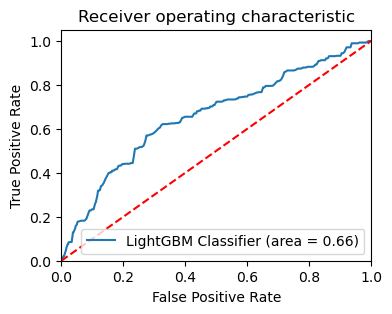

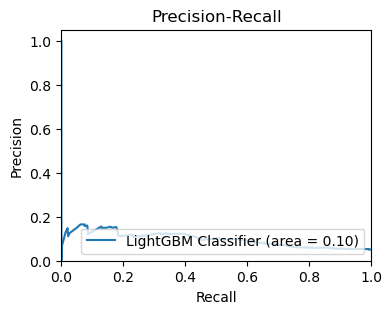

In [19]:
lgbmodel(X_train, y_train.values.ravel(), X_val, y_val.values.ravel(), X_test, y_test.values.ravel(), "25th quantile")

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 30406, number of used featu

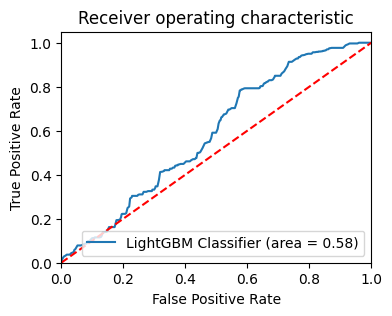

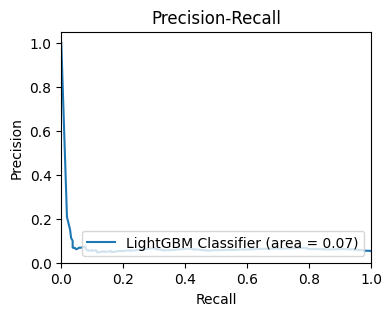

In [49]:
lgbmodel(X_train_75, y_train.values.ravel(), X_val_75, y_val.values.ravel(), X_test_75, y_test.values.ravel(), "75th quantile")

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2582
[LightGBM] [Info] Num

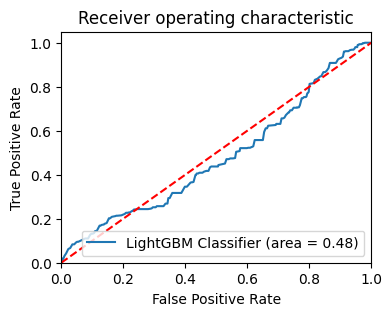

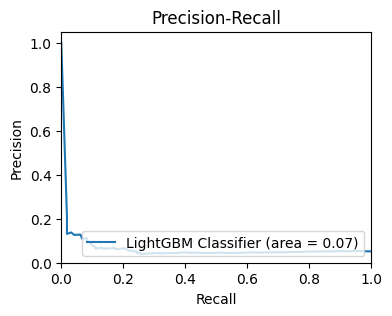

In [52]:
lgbmodel(X_train_mean, y_train.values.ravel(), X_val_mean, y_val.values.ravel(), X_test_mean, y_test.values.ravel(), "75th quantile")

## Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV


In [14]:
gbm_random = RandomizedSearchCV(estimator = lgb, param_distributions = random_grid, 
                         n_iter = 100, cv = 2, scoring='neg_mean_absolute_error',
                          verbose=10, random_state=42)

NameError: name 'lgbm' is not defined

In [16]:
param_grid = {
    'num_leaves': [31, 50, 60, 90, 127, 150, 175, 185, 190, 200, 225],
    'reg_alpha': [0.1, 0.5, 1, 1.5, 2, 2.5],
    'min_data_in_leaf': [10,15, 20, 25, 30],
    'lambda_l1': [0,0.5,1,1.5, 2, 2.5, 3],
    'lambda_l2': [0,0.5,1],
    'reg_lambda':[0.5,1,1.5,1.75,2, 2.25, 2.5, 3],
    'n_estimators': [100,110, 115, 120 ,125,130,135, 140, 145,150,165,175],
    'max_depth':[3,6,9,12, 15,18,21,24],
    'min_child_weight':[4.0, 8.0, 10.0, 12.0, 12.5, 15.0],
    'scale_pos_weight':[2,5,7,9,11,13,15]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = RandomizedSearchCV(lgb_estimator, param_grid, cv=3, n_jobs=3)
lgb_model = gsearch.fit(X=X_train, y=y_train.values.ravel())

print(lgb_model.best_params_, lgb_model.best_score_)

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.25 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.25 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.25 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.75 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=2 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.25 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=2 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.25 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=2 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.25 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
{'scale_pos_weight': 2, 'reg_lambda': 1.5, 'reg_alpha': 1.5, 'num_leaves': 50, 'n_estimators': 135, 'min_data_in_leaf': 10, 'min_child_weight': 4.0, 'max_depth': 12, 'lambda_l2': 1, 'lambda_l1': 0} 0.9082747613868912


In [ ]:
%%time

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)

## RFE

In [23]:
# Feature importance

#lightGBM model fit

model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=4.0, n_estimators=135, num_leaves=50,
               random_state=42, reg_alpha=1.5, reg_lambda=1.5,
               scale_pos_weight=2, verbosity=1, min_data_in_leaf=10,lambda_l2=1, lambda_l1 = 0)
model.fit(X_train, y_train)
model.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':model.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9365
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

,cols,fea_imp
21,mean_0_25,321
17,std_0_25,287
0,reads_count,286
33,mean_+1_25,280
35,mean_+1_75,236
20,std_0_mean,204
29,std_+1_25,194
19,std_0_75,193
23,mean_0_75,185
13,dwelling_time_0_25,184


In [49]:
fea_imp_.loc[fea_imp_.fea_imp > 114].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
21,mean_0_25,321
17,std_0_25,287
0,reads_count,286
33,mean_+1_25,280
35,mean_+1_75,236
20,std_0_mean,204
29,std_+1_25,194
19,std_0_75,193
23,mean_0_75,185
13,dwelling_time_0_25,184


In [25]:
len(X_train.columns)

65

In [32]:
#Recursive Feature Elimination(RFE)
from sklearn.feature_selection import RFE

# create the RFE model and select 10 attributes
rfe = RFE(model,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)

# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X_train.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9365
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9361
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9357
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9355
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9353
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of nega

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9347
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_da

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9343
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9341
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9339
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9337
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9333
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9078
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8583
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8090
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7580
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7325
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7070
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6815
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6586
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6348
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6093
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5838
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_col_wise=tru

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5073
[LightGBM] [In

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4818
[LightGBM] [In

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001977 seconds.
You can set `force_col_wise=tru

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, th

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4053
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3798
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3543
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3288
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3033
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2799
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

,cols,fea_rank
0,reads_count,1
21,mean_0_25,1
20,std_0_mean,1
35,mean_+1_75,1
17,std_0_25,1
...,...,...
53,position_4_A,52
52,position_3_T,53
48,position_2_T,54
47,position_2_G,55


In [39]:
top_few_fe = fea_rank_.loc[fea_rank_.fea_rank < 20].sort_values(by=['fea_rank'], ascending = True)['cols'].unique()
X_train_fe = X_train[top_few_fe]
X_val_fe = X_val[top_few_fe]
X_test_fe = X_test[top_few_fe]

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7070
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

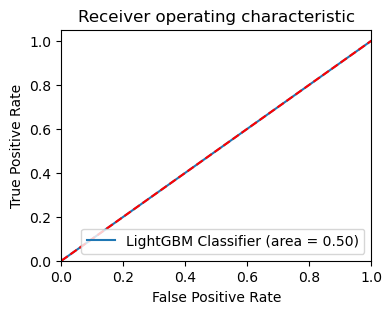

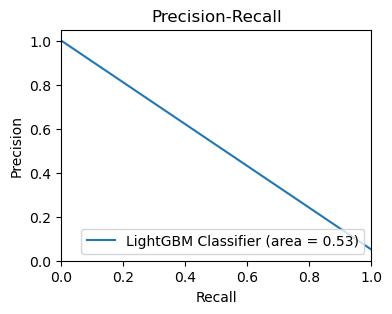

In [45]:
lgbmodel(X_train_fe, y_train.values.ravel(), X_val_fe, y_val.values.ravel(), X_test_fe, y_test.values.ravel(), "25th quantile")

In [50]:
#fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':model.feature_importances_})
top_few_imp = fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)['cols'].unique()
X_train_imp = X_train[top_few_imp]
X_val_imp = X_val[top_few_imp]
X_test_imp = X_test[top_few_imp]

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

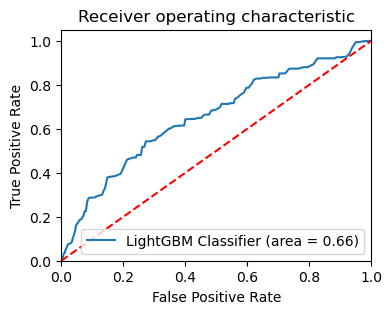

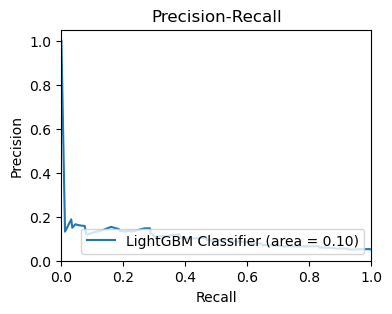

In [51]:
lgbmodel(X_train_imp, y_train.values.ravel(), X_val_imp, y_val.values.ravel(), X_test_imp, y_test.values.ravel(), "25th quantile")

# Exporting Datasets

In [20]:
%cd ../data/preprocessed_data

c:\Users\lowmi\OneDrive\Desktop\Uni\DSA4262\DSA4262-ACMXZ\data\preprocessed_data


In [21]:
df_all_features.to_parquet("df_all_features.parquet") # df containing all features, before splitting/encoding
df_train.to_parquet("df_train.parquet") # df containing all features, after splitting, before encoding
df_test.to_parquet("df_test.parquet") # df containing all features, after splitting, before encoding
df_val.to_parquet("df_val.parquet") # df containing all features, after splitting, before encoding
X_train.to_parquet("X_train.parquet") # df containing all features, after splitting, before encoding
y_train.to_parquet("y_train.parquet") # df containing all features, after splitting, before encoding
X_val.to_parquet("X_val.parquet") # df containing all features, after splitting, before encoding
y_val.to_parquet("y_val.parquet") # df containing all features, after splitting, before encoding
X_test.to_parquet("X_test.parquet") # df containing all features, after splitting, before encoding
y_test.to_parquet("y_test.parquet") # df containing all features, after splitting, before encoding
df_val_id.to_parquet("df_val_id.parquet") # df containing all features, after splitting, before encoding
X_train_enc.to_parquet("X_train_enc.parquet") # df containing all features, after encoding and oversampling
X_test_enc.to_parquet("X_test_enc.parquet") # df containing all features, after encoding and oversampling
X_val_enc.to_parquet("X_val_enc.parquet") # df containing all features, after encoding and oversampling
X_train_25.to_parquet("X_train_25.parquet")  # final df containing 25 percentile features for modelling
X_train_50.to_parquet("X_train_50.parquet") # final df containing 50 percentile features for modelling
X_train_75.to_parquet("X_train_75.parquet") # final df containing 75 percentile features for modelling
X_train_mean.to_parquet("X_train_mean.parquet") # final df containing mean features for modelling
